In [1]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
%run ./func_v2.ipynb

In [3]:
D, J = 60,60

# a side of the 
num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=42)

print("Demand Points:")
print(demand_points)

print("\nCandidate Sites:")
print(candidate_sites)

Demand Points:
[(36, 18), (9, 18), (44, 10), (46, 8), (25, 24), (22, 16), (35, 49), (11, 35), (29, 36), (42, 45), (24, 1), (31, 12), (43, 9), (39, 22), (26, 33), (4, 34), (22, 3), (11, 38), (12, 34), (33, 25), (11, 5), (35, 36), (9, 16), (48, 10), (50, 22), (49, 35), (30, 35), (19, 49), (17, 38), (29, 42), (39, 48), (1, 1), (36, 4), (12, 50), (47, 22), (17, 22), (11, 19), (48, 31), (48, 23), (38, 20), (36, 24), (47, 7), (1, 4), (16, 43), (2, 25), (32, 20), (9, 42), (43, 17), (26, 50), (6, 25), (38, 40), (46, 21), (14, 40), (7, 46), (22, 26), (5, 37), (41, 46), (27, 19), (41, 6), (42, 22)]

Candidate Sites:
[(10, 33), (7, 35), (21, 26), (19, 28), (17, 46), (27, 38), (39, 24), (21, 27), (38, 19), (3, 40), (15, 9), (8, 25), (16, 25), (43, 11), (41, 44), (48, 35), (3, 19), (16, 4), (15, 14), (2, 42), (4, 33), (18, 27), (32, 23), (9, 38), (39, 14), (39, 3), (20, 44), (28, 6), (4, 21), (36, 23), (4, 44), (43, 26), (6, 23), (12, 27), (16, 21), (36, 48), (47, 42), (47, 3), (20, 33), (34, 16), 

In [4]:
alpha = 0
beta = 0.1

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [5]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
wij_matrix = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", wij_matrix)

# U_i^L の計算
Ui_L = compute_Ui_L(wij_matrix, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(wij_matrix, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[30.01666204 33.61547263 17.         ... 29.12043956 10.44030651
   9.        ]
 [15.03329638 17.11724277 14.4222051  ...  8.06225775 26.
  28.46049894]
 [41.0487515  44.65422712 28.01785145 ... 39.39543121 11.18033989
   8.06225775]
 ...
 [22.02271555 25.61249695  9.21954446 ... 20.24845673 12.52996409
  13.45362405]
 [41.10960958 44.68780594 28.28427125 ... 38.58756276  8.24621125
   5.83095189]
 [33.83784863 37.33630941 21.37755833 ... 34.23448554 16.64331698
  14.31782106]]

w_ij Matrix: [[0.04970418 0.03468156 0.18268352 ... 0.0543645  0.3520329  0.40656966]
 [0.22238845 0.1805542  0.23640224 ... 0.44654023 0.07427358 0.05807326]
 [0.01649208 0.01149983 0.0607016  ... 0.0194571  0.3269219  0.44654023]
 ...
 [0.11055175 0.07720819 0.39774092 ... 0.13201421 0.2856476  0.2604453 ]
 [0.01639201 0.01146128 0.05910575 ... 0.02109422 0.43840106 0.55816805]
 [0.03391883 0.02390588 0.11791918 ... 0.03259982 0.18931714 0.23888283]]

U_i^L: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [6]:
#SEED = 422
#np.random.seed(SEED)

x0 = np.random.rand(len(candidate_sites))  # 例: 初期値
y0 = np.random.rand(len(candidate_sites))  # 同じ次元

In [7]:
x_opt, y_opt, history = lgda_solver(
    x0, y0,
    D,J,num_rows_columns,
    p, r,
    alpha,beta,h_i,J_L, J_F,
    eta_x=0.01, eta_y=0.01,
    mu=1.3,
    max_iter=1000,
    tau_interval=50,
    return_history=True
)

ValueError: too many values to unpack (expected 3)

In [ ]:
print("\nOptimal x:", x_opt)
print("Optimal y:", y_opt)
print("\nHistory of dx:", history["dx"])
print('objective:', history["objective"][-1])
print("num of iter:", len(history["objective"]))


Optimal x: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
Optimal y: [1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0.]

History of dx: [4.27345605 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949
 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949
 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949
 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949
 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949 4.89897949
 4.89897949 4.

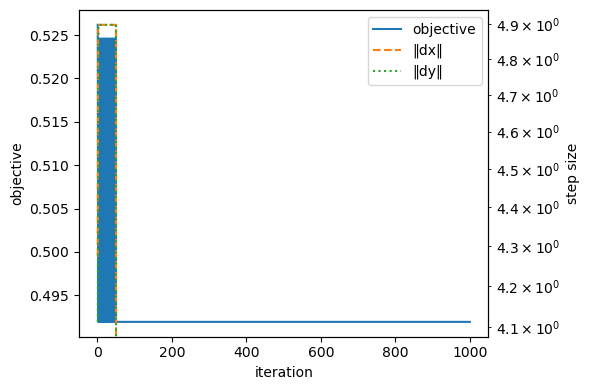

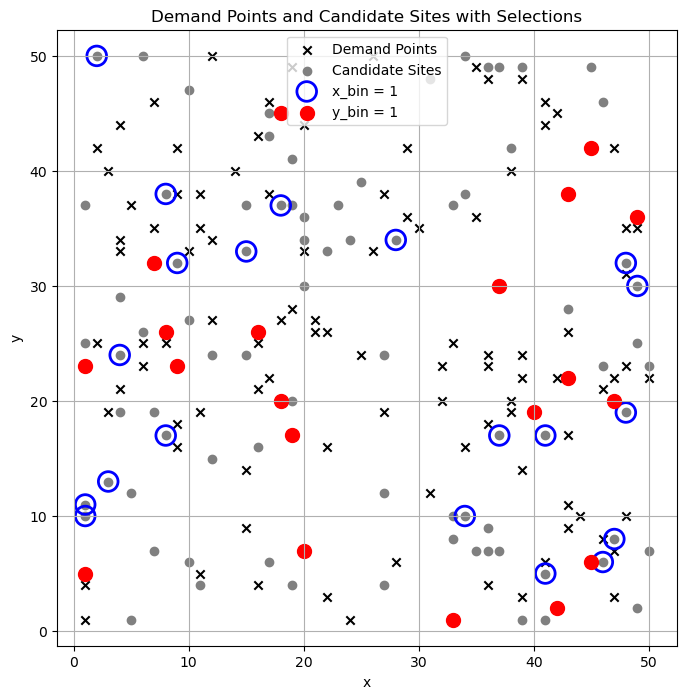

In [ ]:
plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)
plot_facility_selection(candidate_sites, demand_points, x_opt, y_opt)

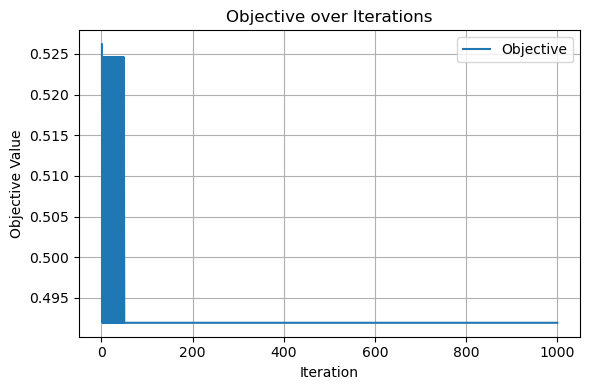

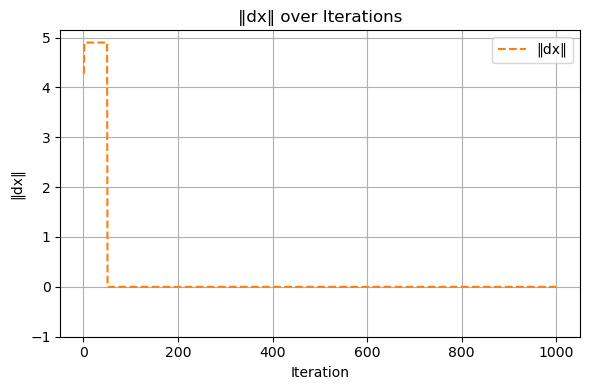

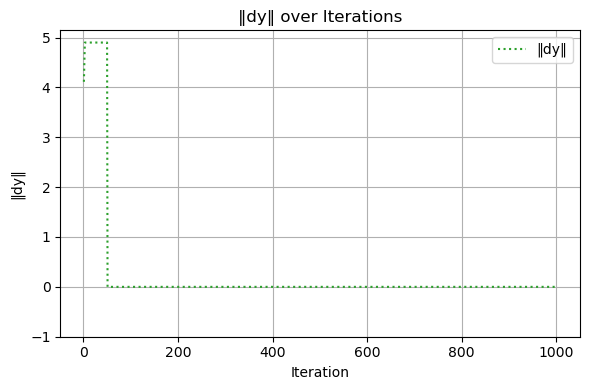

In [ ]:
plot_each_history_component_separately(history)

In [ ]:
'''
create_history_evolution_gif(
    x0=x0,
    y0=y0,
    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),
    Ui_L=Ui_L,
    Ui_F=Ui_F,
    h_i=h_i,
    p=p,
    r=r,
    fixed_param='alpha',
    fixed_value=0.01,
    var_range=np.linspace(0.001, 2.0, 100),
    filename="varying_mu.gif",
    eta_x=0.01,
    eta_y=0.01,
    mu=0.01,
    max_iter=1000,
    tau_interval=50,
    logy=False,
    mode="mu"
)
'''

'\ncreate_history_evolution_gif(\n    x0=x0,\n    y0=y0,\n    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),\n    Ui_L=Ui_L,\n    Ui_F=Ui_F,\n    h_i=h_i,\n    p=p,\n    r=r,\n    fixed_param=\'alpha\',\n    fixed_value=0.01,\n    var_range=np.linspace(0.001, 2.0, 100),\n    filename="varying_mu.gif",\n    eta_x=0.01,\n    eta_y=0.01,\n    mu=0.01,\n    max_iter=1000,\n    tau_interval=50,\n    logy=False,\n    mode="mu"\n)\n'